In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
df = pd.read_pickle('claims_df')

In [3]:
pca_df = df[['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']]

In [4]:
pca_vals = pd.DataFrame(scale(pca_df))

In [5]:
pca_vals.columns = pca_df.columns

In [6]:
pca = PCA()

In [7]:
pca.fit(pca_vals)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

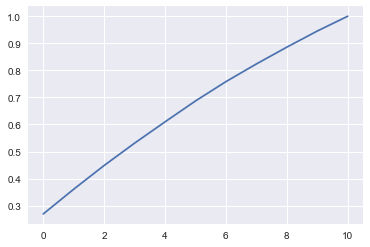

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

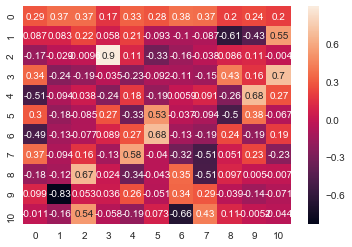

In [9]:
sns.heatmap(pca.components_, annot=True);

# Try different method

In [10]:
lda = LinearDiscriminantAnalysis()

In [11]:
lda.fit(pca_vals, df.TOTAL_PAID)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

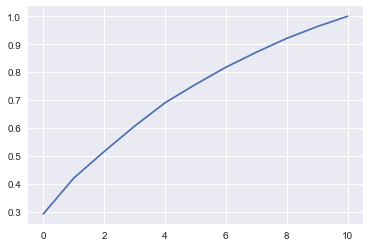

In [12]:
plt.plot(np.cumsum(lda.explained_variance_ratio_));

# Look at payment columns

In [13]:
pmt = df[['MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR']]

In [14]:
pmt_norm = pd.DataFrame(scale(pmt))

In [15]:
pmt_norm.columns = pmt.columns

In [16]:
#pca_pmt = PCA(n_components=5)
pca_pmt = PCA()

In [17]:
pca_pmt.fit(pmt_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pd.DataFrame(pca_pmt.transform(pmt_norm))

,0,1,2,3,4,5,6,7,8
0,-1.454393,-0.026290,-0.435435,0.003521,-0.030699,0.306334,-0.048370,-0.014291,0.013755
1,-1.005317,-0.004915,-0.062115,-0.009197,0.025482,-0.087318,-0.056058,-0.013069,-0.053407
2,-1.289040,0.001058,-0.328708,-0.006301,-0.010279,0.190308,-0.050272,0.023283,-0.015365
3,0.868003,0.475059,0.849093,-0.165368,0.257797,-1.137621,-0.068813,-0.055916,-0.003474
4,-0.626859,0.110672,0.472050,0.034377,0.016455,0.435550,-0.042275,0.104021,-0.136976
5,-0.431140,0.042438,0.370587,-0.032695,0.098685,-0.553368,-0.062282,-0.021333,0.238189
6,-1.020830,0.006602,0.050803,0.018786,0.002091,0.207689,-0.050389,0.002872,-0.204887
7,2.242458,1.357826,0.657125,-0.412399,0.422868,-1.120638,-0.061414,-0.872239,-0.518744
8,7.914219,1.119525,7.737192,0.401429,-0.449528,7.375464,-0.030329,1.894723,-0.414372
9,-0.927689,0.030590,-0.054103,-0.020420,0.035528,-0.104869,-0.054964,-0.024833,0.081399


In [19]:
pmt_comp = pca_pmt.components_

In [20]:
pmt_comp_df = pd.DataFrame(pmt_comp)

In [21]:
pmt_comp_df.columns = pmt_norm.columns

In [22]:
pmt_comp_df

,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0.337365,0.330365,0.072971,0.397051,0.398096,0.071513,0.474030,0.458370,0.125170
1,-0.523746,-0.533816,-0.255851,0.409824,0.416485,0.172998,0.041234,0.033643,-0.033103
2,-0.233046,-0.228977,-0.099791,-0.320349,-0.301583,-0.105905,0.338619,0.381598,0.646707
3,0.024607,0.005583,0.199892,-0.110852,-0.116759,0.959683,-0.022558,-0.012622,0.108746
4,-0.198783,-0.222727,0.931866,0.047743,0.045023,-0.168346,0.062359,0.054700,-0.054552
5,0.120723,0.087264,0.102235,0.241168,0.244088,-0.065327,-0.372389,-0.396095,0.741475
6,-0.709089,0.704299,0.019685,0.008366,0.012965,0.010450,-0.001567,-0.011910,0.016629
7,0.007123,0.002564,0.004907,-0.705812,0.708166,0.004286,-0.011378,0.002255,-0.009824
8,-0.003529,-0.013105,-0.007926,-0.028300,-0.014245,0.003778,0.718143,-0.694952,0.006865


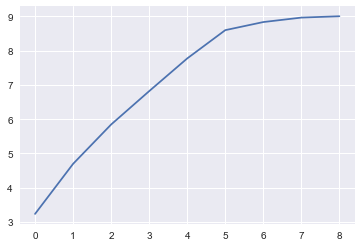

In [23]:
plt.plot(np.cumsum(pca_pmt.explained_variance_));

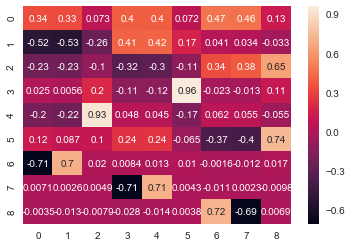

In [24]:
sns.heatmap(pmt_comp, annot=True);